# Iris Flowers


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
plt.style.use('seaborn')

In [2]:
s_dict={}
df=pd.read_csv("iris.csv")
df.index=df.index+1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Plotting

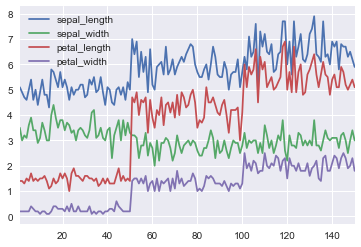

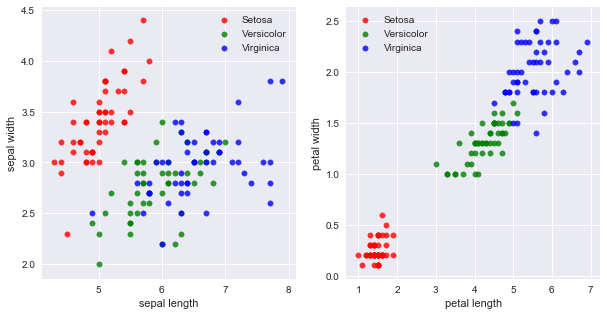

In [3]:
df.plot()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

seto=df.where(df['species']=='setosa')
versi=df.where(df['species']=='versicolor')
vir=df.where(df['species']=='virginica')

ax1.scatter(seto['sepal_length'],seto['sepal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax1.scatter(versi['sepal_length'],versi['sepal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax1.scatter(vir['sepal_length'],vir['sepal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend()


ax2.scatter(seto['petal_length'],seto['petal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax2.scatter(versi['petal_length'],versi['petal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax2.scatter(vir['petal_length'],vir['petal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax2.set_xlabel('petal length')
ax2.set_ylabel('petal width')
ax2.legend()
plt.show()


# Train & Test

In [4]:
cols=df.columns
X=df[cols[:-1]]
y=df[cols[-1]]
print(X.head(),'\n',y.head())

   sepal_length  sepal_width  petal_length  petal_width
1           5.1          3.5           1.4          0.2
2           4.9          3.0           1.4          0.2
3           4.7          3.2           1.3          0.2
4           4.6          3.1           1.5          0.2
5           5.0          3.6           1.4          0.2 
 1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0) #use random_state=0 parameter if need to reproduce
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
115,5.8,2.8,5.1,2.4
63,6.0,2.2,4.0,1.0
34,5.5,4.2,1.4,0.2
108,7.3,2.9,6.3,1.8
8,5.0,3.4,1.5,0.2


# Scaling

In [6]:
X_train2=MinMaxScaler().fit_transform(X_train)
X_test2=MinMaxScaler().fit_transform(X_test)

# Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
mnb=MultinomialNB().fit(X_train,y_train)
s_dict['Naive Bayes']=mnb.score(X_test,y_test)
print(s_dict['Naive Bayes'])

0.5789473684210527


# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

Using non scaled dataset

In [89]:
lr=LogisticRegression(C=1, solver='lbfgs', multi_class='auto', ).fit(X_train, y_train)
s_dict['Logistic Regression']=lr.score(X_test,y_test)
print('Train: ', lr.score(X_train,y_train))
print('Test: ',s_dict['Logistic Regression'])

#plt.figure()
#lr_pred=lr.predict(X_test)
#plt.plot(lr_pred,'x')
#plt.plot(y_test, '-',color='red')

Train:  0.9821428571428571
Test:  0.9736842105263158


Using scaled datasets

In [90]:
lr2=LogisticRegression(C=100, solver='lbfgs', multi_class='auto').fit(X_train2, y_train)
s_dict['Logistic Regression(scaled)']=lr2.score(X_test2,y_test)
print('Train: ', lr2.score(X_train2,y_train))
print('Test: ',s_dict['Logistic Regression(scaled)'])

Train:  0.9821428571428571
Test:  0.9736842105263158


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

No need of scaling here

In [39]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
s_dict['Decision Tree']=dt.score(X_test,y_test)
print('Train: ', dt.score(X_train, y_train))
print('Test: ',s_dict['Decision Tree'])

Train:  1.0
Test:  0.9736842105263158


# Support Vector Machine

In [40]:
from sklearn.svm import SVC

Using non scaled dataset

In [84]:
sv=SVC(C=3,kernel='rbf',gamma='scale').fit(X_train,y_train)
s_dict['SVM']=sv.score(X_test,y_test)
print('Train: ',sv.score(X_train, y_train))
print('Test: ',s_dict['SVM'])

Train:  0.9732142857142857
Test:  0.9736842105263158


Using scaled dataset

In [75]:
sv2=SVC(C=0.7,kernel='rbf',gamma='scale').fit(X_train2,y_train)
s_dict['SVM (scaled)']=sv2.score(X_test2,y_test)
print('Train: ',sv2.score(X_train2, y_train))
print('Test: ',s_dict['SVM (scaled)'])

Train:  0.9732142857142857
Test:  0.9736842105263158


# k Nearest Neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
neighbors=[x for x in range(15,50)]

Using non scaled datasets

In [102]:
maxi,idm=0,0
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    #print(knn.score(X_test,y_test),'    ',n)
    print('Train: ',knn.score(X_train, y_train))
    print('Test: ',knn.score(X_test,y_test),'\tneighbors: ',n,'\n')
    if knn.score(X_test,y_test)>maxi:
        maxi=knn.score(X_test,y_test)
        idm=n
s_dict['kNN']=maxi
print(s_dict['kNN'], "for ",idm,' neighbors')

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  15 

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  16 

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  17 

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  18 

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  19 

Train:  0.9642857142857143
Test:  0.9736842105263158 	neighbors:  20 

Train:  0.9553571428571429
Test:  0.9736842105263158 	neighbors:  21 

Train:  0.9553571428571429
Test:  0.9736842105263158 	neighbors:  22 

Train:  0.9464285714285714
Test:  0.9736842105263158 	neighbors:  23 

Train:  0.9375
Test:  0.9473684210526315 	neighbors:  24 

Train:  0.9464285714285714
Test:  0.9473684210526315 	neighbors:  25 

Train:  0.9732142857142857
Test:  0.9473684210526315 	neighbors:  26 

Train:  0.9642857142857143
Test:  0.9473684210526315 	neighbors:  27 

Train:  0.9642857142857143
Test:  0.9210526315789473 	neighbors:  28 

Train:  0.9375
Tes

Using scaled datasets

In [106]:
maxm,idmi=0,0
for n in neighbors:
    knn2=KNeighborsClassifier(n_neighbors=n).fit(X_train2,y_train)
    print('Train: ',knn2.score(X_train2, y_train))
    print('Test: ',knn2.score(X_test2,y_test),'\tneighbors: ',n,'\n')
    if knn2.score(X_test2,y_test)>maxm:
        maxm=knn2.score(X_test2,y_test)
        idmi=n
s_dict['kNN(scaled)']=maxm
print(s_dict['kNN(scaled)'], 'for ',idmi,' neighbors')

Train:  0.9553571428571429
Test:  0.9473684210526315 	neighbors:  15 

Train:  0.9464285714285714
Test:  0.9736842105263158 	neighbors:  16 

Train:  0.9553571428571429
Test:  0.8947368421052632 	neighbors:  17 

Train:  0.9553571428571429
Test:  0.9210526315789473 	neighbors:  18 

Train:  0.9464285714285714
Test:  0.9210526315789473 	neighbors:  19 

Train:  0.9464285714285714
Test:  0.9210526315789473 	neighbors:  20 

Train:  0.9464285714285714
Test:  0.8947368421052632 	neighbors:  21 

Train:  0.9464285714285714
Test:  0.8947368421052632 	neighbors:  22 

Train:  0.9553571428571429
Test:  0.868421052631579 	neighbors:  23 

Train:  0.9464285714285714
Test:  0.8947368421052632 	neighbors:  24 

Train:  0.9375
Test:  0.868421052631579 	neighbors:  25 

Train:  0.9553571428571429
Test:  0.868421052631579 	neighbors:  26 

Train:  0.9375
Test:  0.868421052631579 	neighbors:  27 

Train:  0.9464285714285714
Test:  0.868421052631579 	neighbors:  28 

Train:  0.9375
Test:  0.86842105263

# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf=RandomForestClassifier(random_state=0).fit(X_train,y_train)
s_dict['Random Forest']=rf.score(X_test,y_test)
print('Train: ',rf.score(X_train, y_train))
print('Test: ',s_dict['Random Forest'])

Train:  1.0
Test:  0.9736842105263158


D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Neural Network

In [109]:
from sklearn.neural_network import MLPClassifier

Using unscaled datasets

In [133]:
nn= MLPClassifier(hidden_layer_sizes=(10,10), solver='adam', random_state=0, alpha=0.1, max_iter=1000).fit(X_train, y_train)
s_dict['Neural Network']=nn.score(X_test, y_test)
print("Train : ",nn.score(X_train, y_train))
print("Test : ",s_dict['Neural Network'])

Train :  0.9821428571428571
Test :  0.9736842105263158


Using Scaled datasets

In [131]:
nn2= MLPClassifier(hidden_layer_sizes=(10,10), solver='adam', random_state=0, alpha=0.1, max_iter=1000).fit(X_train2, y_train)
s_dict['Neural Network (scaled)']=nn2.score(X_test2, y_test)
print("Train : ",nn2.score(X_train2, y_train))
print("Test : ",s_dict['Neural Network (scaled)'])

Train :  0.9732142857142857
Test :  0.9736842105263158


# Score Graph


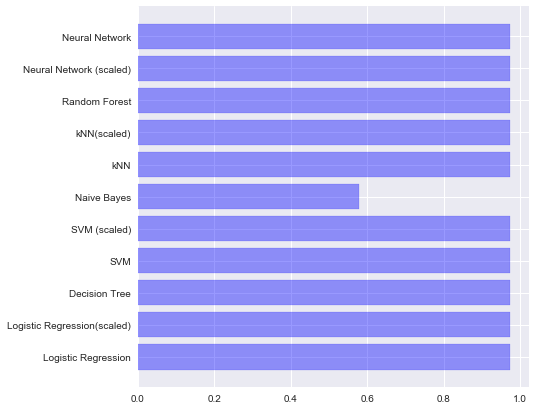

In [134]:
plt.figure(figsize=(7,7))
plt.barh(range(len(s_dict)), list(s_dict.values()), align='center',color='blue',alpha=0.4,edgecolor='blue')
plt.yticks(range(len(s_dict)), list(s_dict.keys()))
plt.show()

In [136]:
ma=0
for i in s_dict.keys():
    if s_dict[i]>ma:
        ma=s_dict[i]
print("Best Algorithms:")
for i in s_dict.keys():
    if s_dict[i]==ma:
        print('{0:30} | {1:20}'.format(i,s_dict[i]))

Best Algorithms:
Logistic Regression            |   0.9736842105263158
Logistic Regression(scaled)    |   0.9736842105263158
Decision Tree                  |   0.9736842105263158
SVM                            |   0.9736842105263158
SVM (scaled)                   |   0.9736842105263158
kNN                            |   0.9736842105263158
kNN(scaled)                    |   0.9736842105263158
Random Forest                  |   0.9736842105263158
Neural Network (scaled)        |   0.9736842105263158
Neural Network                 |   0.9736842105263158
